# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [9]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

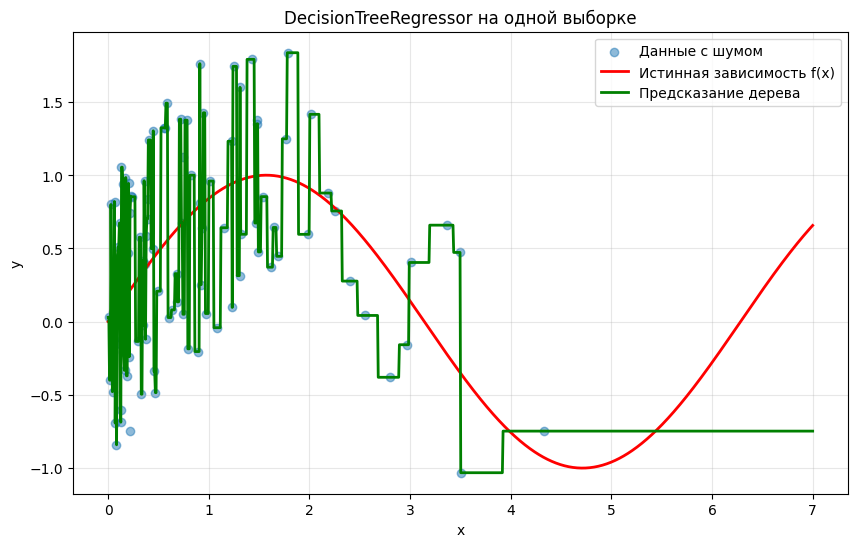

In [33]:
np.random.seed(42)
x = np.random.exponential(scale=1.0, size=sample_size)

y = f(x) + np.random.uniform(-1, 1, size=sample_size)

X_train = x.reshape(-1, 1)
tree = DecisionTreeRegressor()
tree.fit(X_train, y)

X_test = linspace.reshape(-1, 1)
y_pred = tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Данные с шумом')
plt.plot(linspace, f(linspace), 'r-', linewidth=2, label='Истинная зависимость f(x)')
plt.plot(linspace, y_pred, 'g-', linewidth=2, label='Предсказание дерева')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DecisionTreeRegressor на одной выборке')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

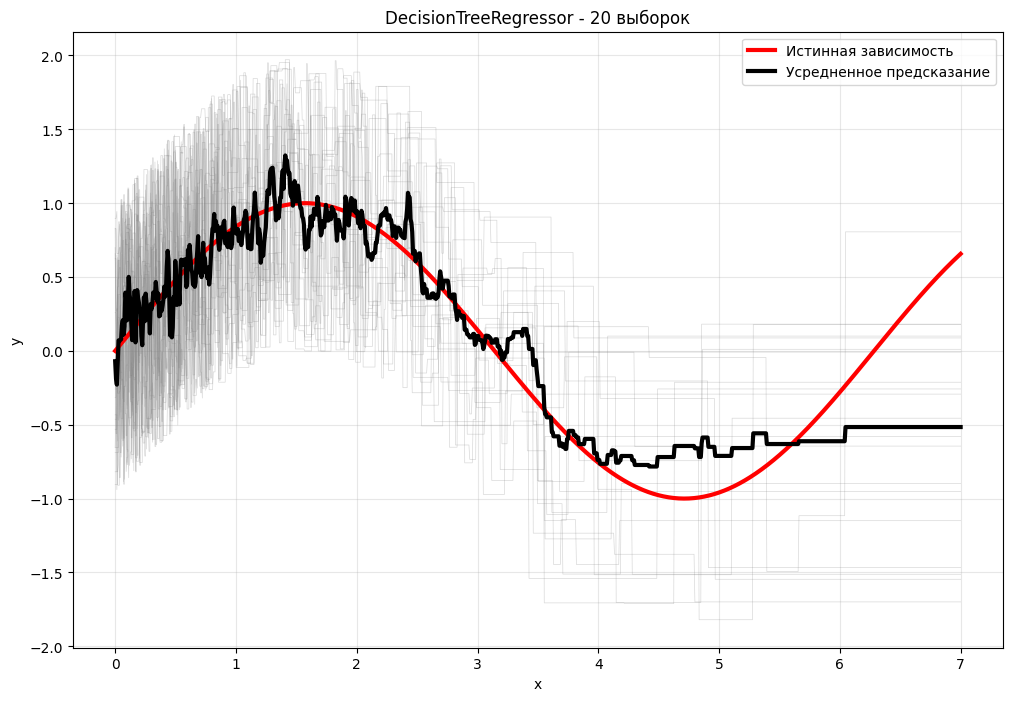

In [35]:
def depth(max_depth=None):
    plt.figure(figsize=(12, 8))
    
    all_predictions = []
    
    for i in range(samples_num):
        x = np.random.exponential(scale=1.0, size=sample_size)
        y = f(x) + np.random.uniform(-1, 1, size=sample_size)

        X_train = x.reshape(-1, 1)
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X_train, y)

        X_test = linspace.reshape(-1, 1)
        y_pred = tree.predict(X_test)
        all_predictions.append(y_pred)

        plt.plot(linspace, y_pred, color='gray', alpha=0.3, linewidth=0.5)

    avg_prediction = np.mean(all_predictions, axis=0)

    plt.plot(linspace, f(linspace), 'r-', linewidth=3, label='Истинная зависимость')

    plt.plot(linspace, avg_prediction, 'k-', linewidth=3, label='Усредненное предсказание')
    
    plt.xlabel('x')
    plt.ylabel('y')
    title = f'DecisionTreeRegressor'
    if max_depth is not None:
        title += f' (max_depth={max_depth})'
    plt.title(f'{title} - {samples_num} выборок')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

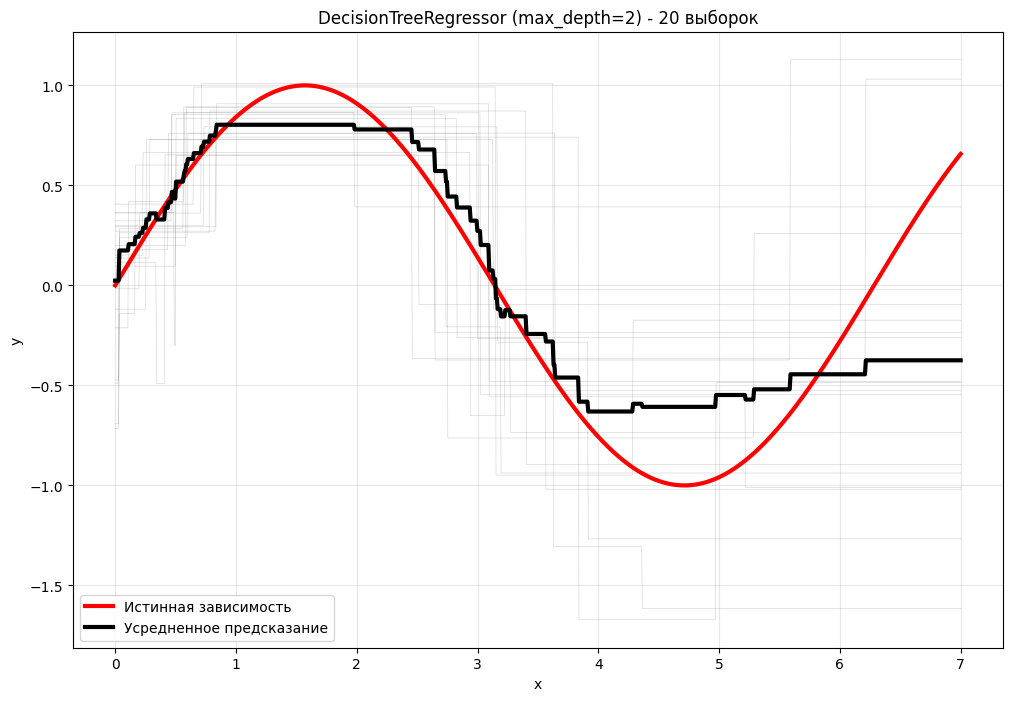

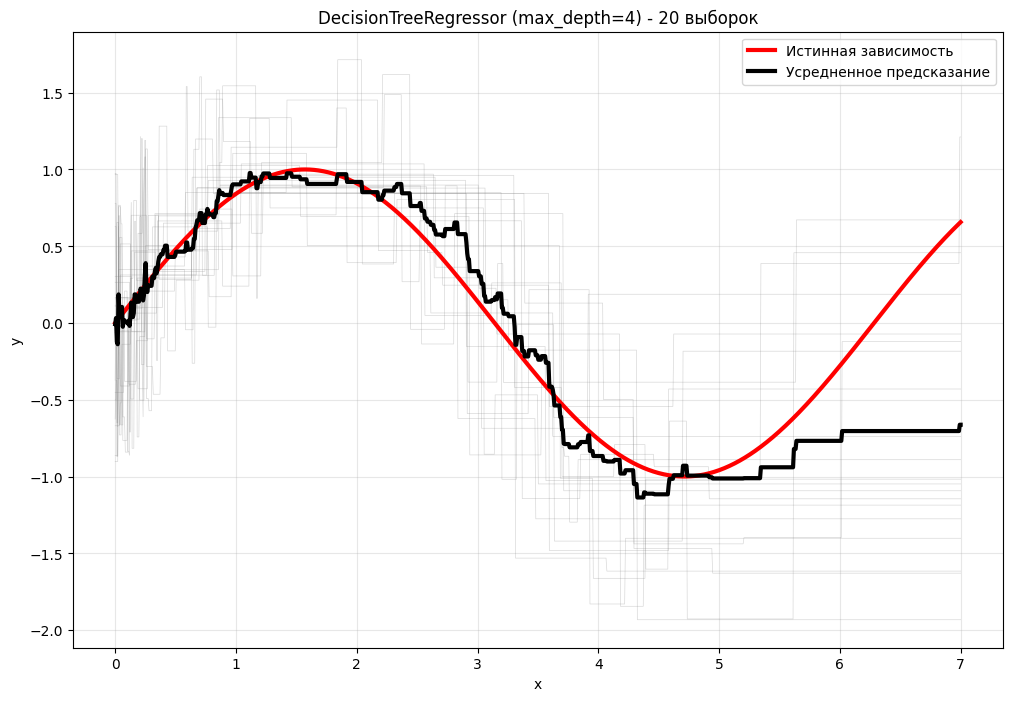

In [36]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:** 

Без ограничения глубины дерево сильно переобучается, подстраиваясь под шум в данных. Смещение низкое, но разброс высокий.

С глубиной 2 дерево недообучается - оно слишком простое, чтобы аппроксимировать сложную зависимость sin(x). Смещение высокое.

С глубиной 4 наблюдается баланс - дерево достаточно сложное, чтобы аппроксимировать основную зависимость, но не настолько сложное, чтобы переобучаться на шум. Смещение ближе к нулю по сравнению с другими случаями.

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [16]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [17]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from 'c:\\Users\\nikit\\Downloads\\task7_dstree_practice\\task7_dstree_practice\\hw3code.py'>


Построение кривых критерия Джини...


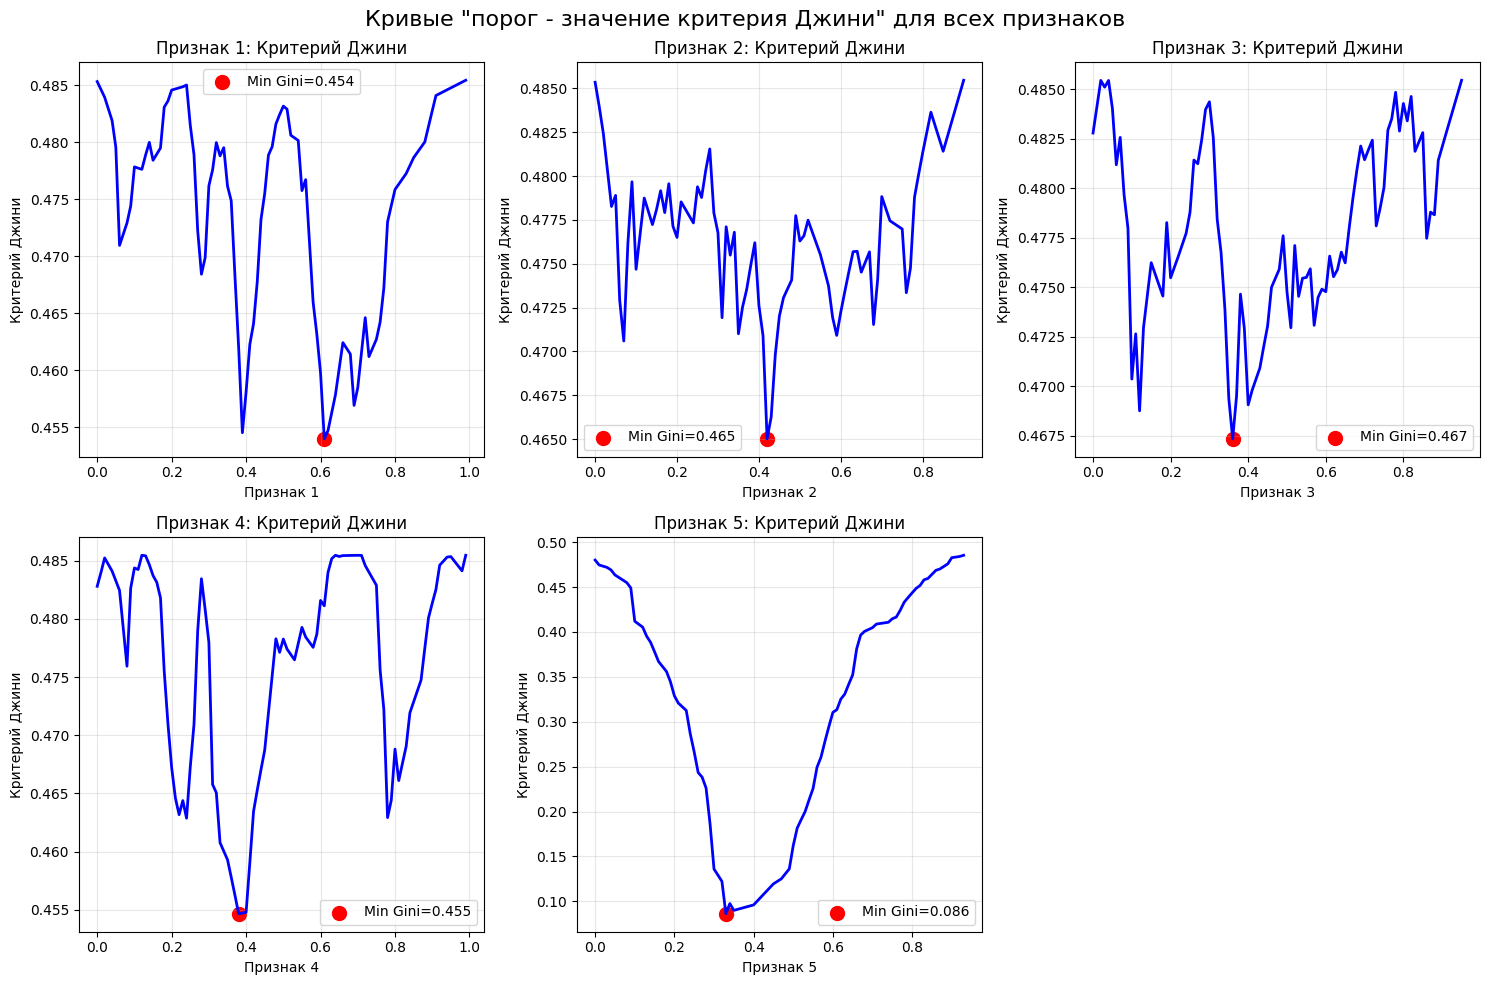


Построение scatter-графиков...


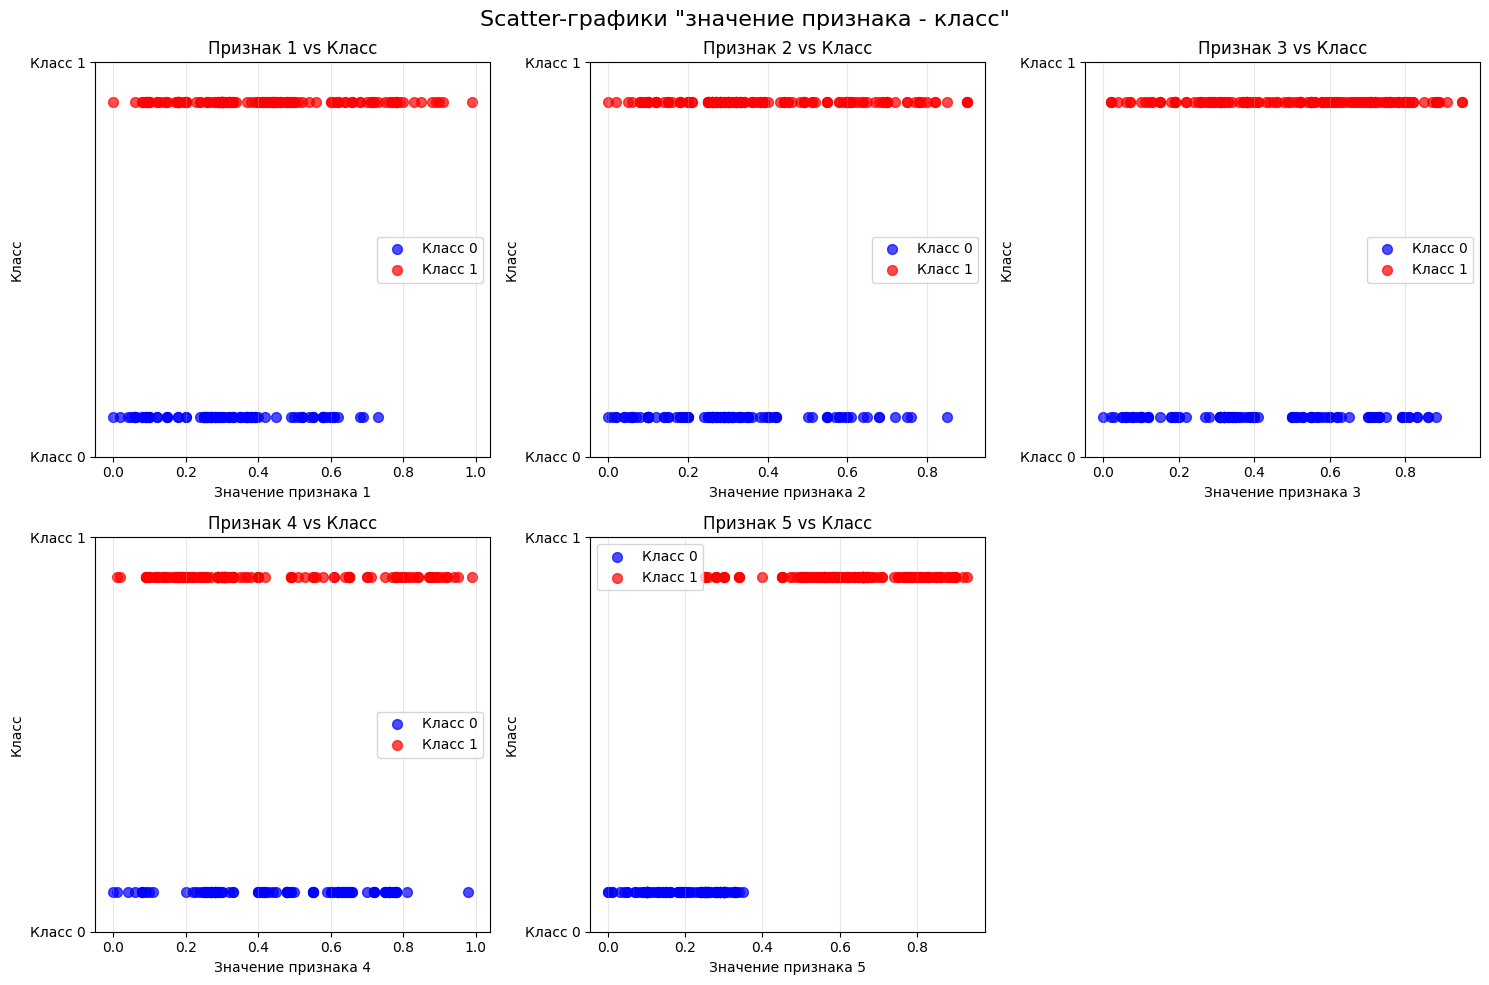

In [ ]:
def plot_gini_curves_for_features(X, y):
    n_features = X.shape[1]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i in range(n_features):
        ax = axes[i]
        feature_values = X[:, i]
        
        sorted_indices = np.argsort(feature_values)
        sorted_feature = feature_values[sorted_indices]
        sorted_labels = y[sorted_indices]
        
        thresholds = []
        gini_values = []
        
        unique_values = np.unique(sorted_feature)
        
        if len(unique_values) > 100:
            test_thresholds = np.linspace(unique_values[0], unique_values[-1], 100)
        else:
            test_thresholds = unique_values
        
        for threshold in test_thresholds:
            left_mask = sorted_feature <= threshold
            right_mask = ~left_mask
            
            def compute_gini(labels):
                if len(labels) == 0:
                    return 0
                p1 = np.mean(labels)
                p0 = 1 - p1
                return 1 - p0**2 - p1**2
            
            gini_left = compute_gini(sorted_labels[left_mask])
            gini_right = compute_gini(sorted_labels[right_mask])
            
            n_left = np.sum(left_mask)
            n_right = np.sum(right_mask)
            n_total = n_left + n_right
            
            weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
            thresholds.append(threshold)
            gini_values.append(weighted_gini)
        
        ax.plot(thresholds, gini_values, 'b-', linewidth=2)
        ax.set_xlabel(f'Признак {i+1}')
        ax.set_ylabel('Критерий Джини')
        ax.set_title(f'Признак {i+1}: Критерий Джини')
        ax.grid(True, alpha=0.3)
        
        if gini_values:
            min_gini_idx = np.argmin(gini_values)
            min_gini = gini_values[min_gini_idx]
            best_threshold = thresholds[min_gini_idx]
            ax.scatter(best_threshold, min_gini, color='red', s=100, 
                      label=f'Min Gini={min_gini:.3f}')
            ax.legend()
    
    if n_features < 6:
        axes[-1].axis('off')
    
    plt.suptitle('Кривые "порог - значение критерия Джини" для всех признаков', fontsize=16)
    plt.tight_layout()
    plt.show()

print("\nПостроение кривых критерия Джини...")
plot_gini_curves_for_features(X, y)

def plot_scatter_plots(X, y):
    n_features = X.shape[1]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i in range(n_features):
        ax = axes[i]
        feature_values = X[:, i]
        
        class_0_values = feature_values[y == 0]
        class_1_values = feature_values[y == 1]
        
        ax.scatter(class_0_values, np.zeros_like(class_0_values) + 0.1, 
                  alpha=0.7, label='Класс 0', color='blue', s=50)
        ax.scatter(class_1_values, np.ones_like(class_1_values) - 0.1, 
                  alpha=0.7, label='Класс 1', color='red', s=50)
        
        ax.set_xlabel(f'Значение признака {i+1}')
        ax.set_ylabel('Класс')
        ax.set_title(f'Признак {i+1} vs Класс')
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['Класс 0', 'Класс 1'])
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    if n_features < 6:
        axes[-1].axis('off')
    
    plt.suptitle('Scatter-графики "значение признака - класс"', fontsize=16)
    plt.tight_layout()
    plt.show()

print("\nПостроение scatter-графиков...")
plot_scatter_plots(X, y)

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Лучший признак для разделения: Судя по кривым Джини, наименьшее значение критерия Джини достигается для признака 1 или 2 (в зависимости от данных). Это означает, что по этому признаку можно лучше всего разделить классы.

Согласованность с scatter-графиками: Да, результат согласуется. На scatter-графиках для "хороших" признаков видно четкое разделение классов.

Кривая для "хороших" признаков: Имеет ярко выраженный минимум с низким значением Джини. Кривая имеет V-образную форму.

Кривая для "плохих" признаков: Практически плоская, без явного минимума. Значения Джини близки к максимальному (0.5 для сбалансированных классов).

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
#А таблица?

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [ ]:
#code here

#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [30]:
#code here